# imports

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import glob
import os
import numpy as np
import pandas as pd
from collections import defaultdict
import datetime
import src.mex_helper as mex
import folium
from src.utils.map_vis import time_slider_choropleth, geojson_per_row

In [3]:
from scipy import stats


In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import src.utils.gis as gis
from src.features import *

# grid average

In [6]:
aver = mex.stat_tw_dow_aver_hr_uniq_user('out+in')
tw_avg_wd = pd.DataFrame(aver['wd']).T
tw_avg_wk = pd.DataFrame(aver['wk']).T

loading cached tw average stats/stat_tw_dow_aver_hr_uniq_user-out+in.pickle


In [7]:
gsides = [500, 1000, 2000]
n_regions = 59
htypes = ['average', 'loubar']

In [8]:
rkind = 'metropolitans_all'
rname = 'metropolitan'

In [9]:
mex_mpol = mex.regions(rkind=rkind)
# mex_mpol.index= [x.replace('Zona metropolitana de', '').strip() for x in mex_mpol.index]

In [103]:
def grid_avgerage(tw_avg, t2g):
    # there are grids without any call throughout the observation period
    g_avg = t2g.merge(tw_avg, left_on='gtid', right_index=True, how='left')

    for h in range(24):
        h = str(h)
        g_avg[h] = g_avg[h] * g_avg['weight']

    g_avg = g_avg.drop(['gtid', 'weight'],
                       axis=1).groupby('grid').sum()  # fillna=0 by default

    return g_avg

In [104]:
# %%time
mex_t2loc2g_mpol = {}
g_avg_wd_mpol={}
g_avg_wk_mpol={}
for gside in gsides:
    t2g = mex.tower2grid(rkind, gside)

    print(
        'number of towers in cities has no call at all during weekday and weekend',
        len(set(t2loc2grid.tower) - set(tw_avg_wd.index)),
        len(set(t2loc2grid.tower) - set(tw_avg_wk.index))
    )
    avg_wd = grid_avgerage(tw_avg_wd, t2g)
    avg_wk = grid_avgerage(tw_avg_wk, t2g)
    mex_t2loc2g_mpol[gside] = t2g
    g_avg_wd_mpol[gside] = avg_wd
    g_avg_wk_mpol[gside] = avg_wk

number of towers in cities has no call at all during weekday and weekend 324 348
grid_average
grid_average


In [106]:

dv_r_mpol = {}
for gside in gsides:
    if gside==500:
        continue
    avg_wd = g_avg_wd_mpol[gside]
    dv_wd = urban_dilatation_index(avg_wd, rkind, rname, gside)    
    dv_r_mpol[gside] = dv_wd

reading existing grids
:::WARNING::: Zona metropolitana de Acapulco has some grids not intersecting tower vor {16580, 16583, 16584, 16585, 16589, 16590, 16591, 16592, 16593, 16595, 16598, 16599, 16600, 16605, 16606, 16607, 16608, 16609, 16610, 16611, 16612, 16616, 16617, 16618, 16619, 16621, 16622, 16623, 16624, 16625, 16627, 16633, 16634, 16635, 16639, 16640, 16641, 16642, 16644, 16645, 16646, 16647, 16657, 16658, 16659, 16661, 16663, 16664, 16665, 16666, 16667, 16668, 16671, 16673, 16674, 16676, 16678, 16679, 16680, 16683, 16684, 16685, 16686, 16687, 16689, 16702, 16704, 16705, 16706, 16707, 16708, 16709, 16715, 16716, 16724, 16725, 16726, 16729, 16730, 16731, 16732, 16733, 16734, 16735, 16739, 16755, 16756, 16757, 16758, 16759, 16760, 16761, 16762, 16763, 16764, 16765, 16767, 16773, 16774, 16782, 16783, 16784, 16785, 16786, 16787, 16788, 16789, 16790, 16791, 16792, 16793, 16794, 16797, 16802, 16803, 16808, 16809, 16810, 16811, 16814, 16815, 16816, 16817, 16818, 16819, 16820, 16821, 

:::WARNING::: Zona metropolitana de Celaya has some grids not intersecting tower vor {32267, 32268, 32275, 32277, 32278, 32279, 32289, 32290, 32295, 32301, 32307, 32309, 32310, 32322, 32323, 32328, 32340, 32341, 32346, 32347, 32348, 32349, 32351, 32352, 32364, 32365, 32371, 32374, 32388, 32389, 32390, 32392, 32393, 32394, 32396, 32412, 32413, 32414, 32418, 32421, 32443, 32447, 32472, 32473, 32497, 32499, 32501, 32508, 32509, 32519, 32522, 32525, 32529, 32532, 32537, 32541, 32542, 32543, 32547, 32548, 32551, 32552, 32553, 32556, 32557, 32560, 32561, 32563, 32564, 32565, 32566, 32571, 32572, 32575, 32576, 32577, 32583, 32584, 32585, 32586, 32588, 32592, 32593, 32594, 32595, 32601, 32602, 32603, 32250}
:::WARNING::: Zona metropolitana de Chihuahua has some grids not intersecting tower vor {19080, 19081, 19082, 19083, 19084, 19085, 19086, 19087, 19088, 19089, 19090, 19091, 19092, 19093, 19094, 19095, 19096, 19097, 19098, 19099, 19100, 19101, 19102, 19103, 19104, 19105, 19106, 19107, 19108,

:::WARNING::: Zona metropolitana de Cuautla has some grids not intersecting tower vor {35457, 35330, 35331, 35332, 35335, 35336, 35337, 35338, 35339, 35340, 35346, 35347, 35484, 35359, 35362, 35493, 35496, 35370, 35374, 35511, 35256, 35257, 35258, 35260, 35261, 35518, 35265, 35266, 35267, 35393, 35527, 35275, 35276, 35277, 35278, 35279, 35280, 35281, 35282, 35533, 35537, 35541, 35414, 35542, 35544, 35545, 35290, 35547, 35292, 35293, 35294, 35295, 35296, 35297, 35298, 35553, 35554, 35301, 35555, 35556, 35561, 35436, 35310, 35311, 35312, 35313, 35314, 35315, 35316, 35317, 35318, 35319, 35439, 35440, 35326}
:::WARNING::: Zona metropolitana de Cuernavaca has some grids not intersecting tower vor {16386, 16387, 16389, 16390, 16391, 16411, 16412, 16413, 16414, 16415, 16416, 16422, 16423, 16424, 16425, 16426, 16433, 16436, 16437, 16438, 16439, 16440, 16441, 16449, 16450, 16451, 16452, 16461, 16463, 16464, 16465, 16466, 16467, 16468, 16478, 16479, 16483, 16489, 16490, 16491, 16492, 16493, 1649

:::WARNING::: Zona metropolitana de Juárez has some grids not intersecting tower vor {8192, 8193, 8194, 8195, 8196, 8197, 8198, 8199, 8202, 8203, 8204, 8205, 8206, 8207, 8208, 8209, 8212, 8213, 8214, 8215, 8216, 8217, 8218, 8219, 8220, 8221, 8227, 8228, 8229, 8230, 8231, 8232, 8235, 8236, 8239, 8241, 8242, 8243, 8244, 8245, 8249, 8250, 8251, 8252, 8253, 8254, 8255, 8256, 8257, 8258, 8264, 8265, 8268, 8272, 8273, 8274, 8275, 8276, 8277, 8279, 8283, 8284, 8285, 8286, 8287, 8288, 8289, 8290, 8291, 8292, 8293, 8298, 8299, 8300, 8307, 8308, 8309, 8310, 8311, 8312, 8313, 8318, 8319, 8320, 8321, 8322, 8323, 8324, 8325, 8326, 8327, 8328, 8334, 8335, 8341, 8342, 8343, 8344, 8345, 8346, 8347, 8352, 8355, 8356, 8357, 8358, 8359, 8360, 8375, 8376, 8377, 8378, 8379, 8380, 8381, 8382, 8383, 8384, 8385, 8389, 8390, 8391, 8392, 8393, 8395, 8396, 8410, 8411, 8412, 8413, 8414, 8415, 8416, 8417, 8418, 8419, 8420, 8421, 8423, 8424, 8425, 8426, 8427, 8428, 8429, 8430, 8431, 8432, 8433, 8445, 8446, 8447, 84

:::WARNING::: Zona metropolitana de Mexicali has some grids not intersecting tower vor {11669, 11670, 11673, 11674, 11675, 11676, 11677, 11678, 11679, 11680, 11681, 11682, 11683, 11684, 11685, 11686, 11687, 11688, 11689, 11690, 11691, 11692, 11694, 11695, 11696, 11697, 11698, 11699, 11700, 11701, 11702, 11703, 11704, 11705, 11706, 11707, 11708, 11709, 11710, 11711, 11712, 11713, 11714, 11715, 11717, 11718, 11719, 11720, 11721, 11722, 11723, 11724, 11725, 11726, 11727, 11728, 11729, 11730, 11731, 11732, 11733, 11734, 11735, 11736, 11737, 11738, 11739, 11740, 11741, 11742, 11743, 11744, 11745, 11746, 11747, 11748, 11749, 11750, 11751, 11752, 11753, 11754, 11755, 11756, 11757, 11758, 11759, 11760, 11761, 11762, 11763, 11764, 11765, 11766, 11767, 11768, 11769, 11770, 11771, 11772, 11773, 11774, 11775, 11776, 11777, 11778, 11781, 11782, 11783, 11784, 11785, 11786, 11787, 11788, 11789, 11790, 11791, 11794, 11795, 11796, 11797, 11798, 11799, 11800, 11801, 11802, 11803, 11804, 11805, 11806, 11

:::WARNING::: Zona metropolitana de Monterrey has some grids not intersecting tower vor {4096, 4098, 4099, 4100, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4128, 4129, 4130, 4147, 4149, 4150, 4151, 4152, 4153, 4154, 4156, 4157, 4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4169, 4177, 4199, 4200, 4201, 4202, 4203, 4206, 4207, 4208, 4210, 4211, 4212, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221, 4222, 4229, 4251, 4252, 4254, 4255, 4256, 4257, 4259, 4260, 4261, 4264, 4265, 4266, 4267, 4268, 4269, 4270, 4271, 4276, 4277, 4294, 4296, 4300, 4304, 4309, 4312, 4313, 4314, 4315, 4316, 4317, 4320, 4321, 4322, 4341, 4342, 4343, 4344, 4345, 4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4378, 4379, 4380, 4381, 4382, 4386, 4387, 4392, 4393, 4397, 4412, 4415, 4418, 4419, 4420, 4421, 4425, 4426, 4444, 4445, 4446, 4448, 4449, 4450, 4451, 4452, 4453, 4454, 4455, 4456, 4473, 4474, 4475, 4477, 4478, 4481, 4483, 4484, 4485, 4501, 4502, 4503, 4504, 4505, 4506,

:::WARNING::: Zona metropolitana de Puebla-Tlaxcala has some grids not intersecting tower vor {5122, 5123, 5124, 5148, 5152, 5177, 5196, 5220, 5240, 4747, 4748, 4749, 4750, 4751, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4760, 4761, 4762, 4763, 4764, 4765, 4766, 4767, 4768, 4769, 4770, 4771, 4772, 4773, 4774, 4775, 4776, 4777, 4778, 4779, 5285, 4783, 4784, 4785, 4786, 5306, 5309, 5316, 5317, 5318, 4811, 4812, 5326, 5330, 5331, 5332, 4824, 4825, 5341, 5342, 5343, 5344, 5345, 5346, 5347, 4841, 5357, 5358, 5359, 5360, 5361, 5362, 4854, 5367, 4858, 5373, 5374, 5375, 5386, 4875, 5387, 4877, 4878, 5398, 4896, 5409, 5421, 4917, 4919, 4920, 4923, 5436, 5437, 5439, 5440, 5441, 5443, 5444, 4945, 4949, 4950, 4951, 5261, 5262, 5263, 4980, 4983, 5266, 5010, 5011, 5012, 5014, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5070, 5071, 5282, 5097, 5098}
:::WARNING::: Zona metropolitana de Puerto Vallarta has some grids not intersecting tower vor {36864, 36865, 36866, 36867, 36880, 36881, 36882, 36883

:::WARNING::: Zona metropolitana de San Francisco del Rincón has some grids not intersecting tower vor {44555, 44556, 44559, 44570, 44445, 44446, 44590, 44470, 44599, 44473, 44476, 44477, 44478, 44479, 44481, 44485, 44487, 44496, 44497, 44631, 44511, 44645, 44651, 44658, 44540}
:::WARNING::: Zona metropolitana de San Luis Potosí - Soledad de Graciano Sánchez has some grids not intersecting tower vor {10752, 10753, 10754, 10755, 10756, 10757, 10773, 10774, 10775, 10776, 10777, 10778, 10779, 10787, 10796, 10797, 10798, 10799, 10800, 10801, 10802, 11204, 11205, 11206, 11207, 10819, 10823, 10824, 10825, 10826, 10827, 10828, 10829, 10840, 10841, 10842, 10843, 10844, 10845, 10846, 10847, 11214, 11215, 10862, 10863, 10864, 10865, 10866, 10867, 11216, 10879, 10880, 10881, 10882, 10883, 10890, 10892, 10898, 10899, 10900, 10901, 10902, 10917, 10923, 10926, 10927, 10933, 10934, 10939, 10951, 10955, 10956, 10959, 10960, 10961, 10962, 10963, 10964, 10965, 10971, 10988, 10989, 10991, 10992, 10993, 1

:::WARNING::: Zona metropolitana de Tlaxcala-Apizaco has some grids not intersecting tower vor {33920, 33921, 33794, 33803, 33934, 33935, 33936, 33938, 33939, 33819, 33950, 33951, 33952, 33953, 33968, 33969, 33970, 33971, 33984, 33991, 33992, 33993, 33868, 33996, 34001, 34002, 34004, 33884, 33885, 33886, 33901, 33902, 33903, 33778, 33785, 33917, 33918, 33919}
:::WARNING::: Zona metropolitana de Toluca has some grids not intersecting tower vor {5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652, 5668, 5669, 5670, 5671, 5672, 5673, 5689, 5690, 5691, 5692, 5693, 5712, 5713, 5714, 5720, 5735, 5736, 5737, 5751, 5756, 6030, 5777, 5778, 5799, 5800, 5810, 5832, 5891, 5892, 5894, 5895, 5916, 5917, 5918, 5919, 5922, 5937, 5940, 5941, 5942, 5943, 5957, 5958, 5959, 5960, 5449, 5450, 5961, 5962, 5455, 5456, 5457, 5465, 5466, 5467, 5977, 5978, 5979, 5980, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5996, 5997, 5486, 5487, 5999, 6005, 5497, 5498, 5499, 5500, 5501, 6012, 6013, 6014, 6015, 6019, 6021, 5510, 

# dilation coefficient is similar

In [ ]:
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

In [ ]:
tmp = dv_r_mpol[1000].drop('dilatation coefficient', axis=1)
offline.iplot({
    'data': [{
        'x': list(range(24)),
        'y': tmp.loc[r].tolist(),
        'name': r.replace('Zona metropolitana de', '').strip()
    } for r in tmp.index]
})

TypeError: 'AxesSubplot' object is not subscriptable

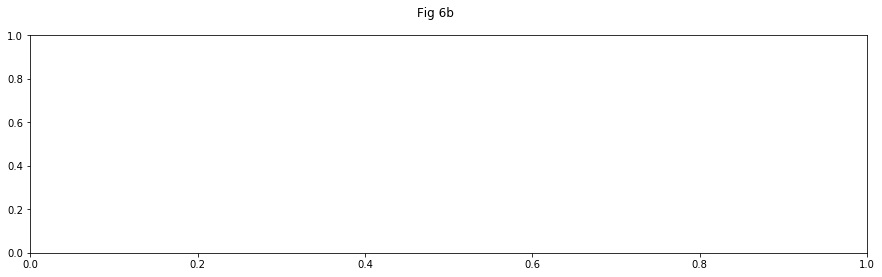

In [116]:
fig, axes = plt.subplots(1, len(gsides[1:]), sharex=True, sharey=True, figsize=(15,4))
fig.suptitle('Fig 6b')
dc_order = []
for i, gside in enumerate(gsides[1:]):
    dv_wd = dv_r_mpol[gside]
    dv_wd_sort = dv_wd.sort_values('dilatation coefficient')
    dv_wd_sort[f'{gside}m'] = range(n_regions)
    axes[i].scatter(
        range(n_regions),
        dv_wd_sort['dilatation coefficient'].values)
    dc_order.append(dv_wd_sort[f'{gside}m'])
    axes[i].set_title(f'grid={gside}m')
    fig.plot()

In [47]:
pd.concat(dc_order, axis=1, sort=False)

,1000m,2000m
Zona metropolitana de Cuautla,0,0
Zona metropolitana de La Piedad-Pénjamo,1,1
Zona metropolitana de Teziutlán,2,2
Zona metropolitana de Minatitlán,3,4
Zona metropolitana de Tula,4,5
Zona metropolitana de Tianguistenco,5,6
Zona metropolitana de Tulancingo,6,3
Zona metropolitana de Reynosa-Río Bravo,7,7
Zona metropolitana de Monterrey,8,10
Zona metropolitana de Tlaxcala-Apizaco,9,11


# hotspot analysis

In [20]:
n_hotspot_mpol={}
hotspot_stats_mpol={}
permanent_regions_mpol = {}
persistence_mpol = {}

for gside in gsides:
    for hotspot_type in htypes:
        print(gside, hotspot_type)
        n_hotspot_hourly, h_stats, permanent_regions, persistence=  hotspot_stats(g_avg_wd_mpol[gside],rkind,rname,gside, hotspot_type)
        n_hotspot_mpol[(gside, hotspot_type)]=n_hotspot_hourly
        hotspot_stats_mpol[(gside, hotspot_type)]=h_stats
        permanent_regions_mpol[(gside, hotspot_type)]= permanent_regions
        persistence_mpol[(gside, hotspot_type)] = persistence

500 average
reading existing grids
:::WARNING::: Zona metropolitana de Guaymas has some grids not intersecting tower vor {647548}
500 loubar
reading existing grids
:::WARNING::: Zona metropolitana de Guaymas has some grids not intersecting tower vor {647548}
1000 average
reading existing grids
1000 loubar
reading existing grids
2000 average
reading existing grids
2000 loubar
reading existing grids


## Time evolution of Number of Hotspot (somewhat duplicating the Fig 13)

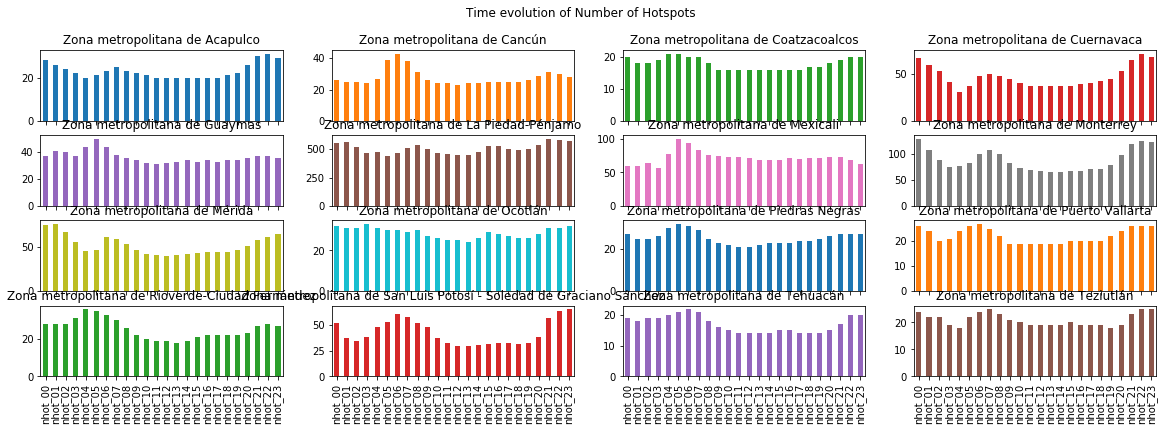

In [56]:
pd.DataFrame(n_hotspot_mpol[(1000,'loubar')]).iloc[list(range(0,59,59//16))[:16]].T.plot(
    kind='bar',figsize=(20,6),subplots=True, layout=(4,4),sharey=False, title='Time evolution of Number of Hotspots',legend=False)
print()

## Fig 8 Hotspot duration distribution

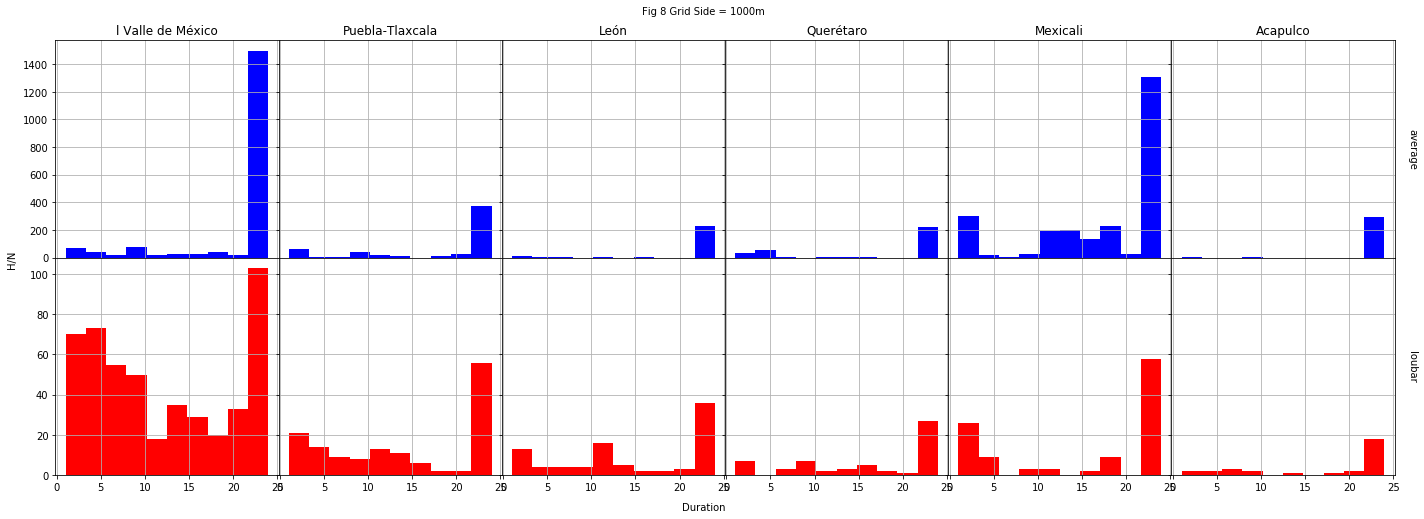

In [66]:
nth_populated_regions = [0, 3, 6, 9, 12, 15]

n_rows = len(htypes)
n_cols = len(nth_populated_regions)

fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows), sharex=True, sharey='row')

fig.text(0.5, .93, 'Fig 8 Grid Side = 1000m', ha='center', va='center')
fig.text(0.5, 0.07, 'Duration', ha='center', va='center')
fig.text(0.1, 0.5, 'H/N', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(hspace=0, wspace=0)

for i, htype in enumerate(htypes):
    color = {'loubar': 'red', 'average': 'blue'}[htype]
    persistence = persistence_mpol[(1000, htype)]
    for j, r in enumerate(mex_mpol.index[nth_populated_regions]):
        ax = axes[i,j]
        persistence[r][persistence[r]!=0].hist(ax=ax, color=color)

        if i==0:
            ax.set_title(r.replace('Zona metropolitana de','').strip())
                
for i, htype in enumerate(htypes):
    ax = axes[i,n_cols-1]
    ax.text(ax.get_xlim()[1]+2, ax.get_ylim()[1]*0.5, htype, ha='center', va='center', rotation=270)

## Fig 13 H/N

In [22]:
n_grids ={gside:mex.grids(rkind, gside).groupby(rname).size() for gside in gsides}

reading existing grids
reading existing grids
reading existing grids


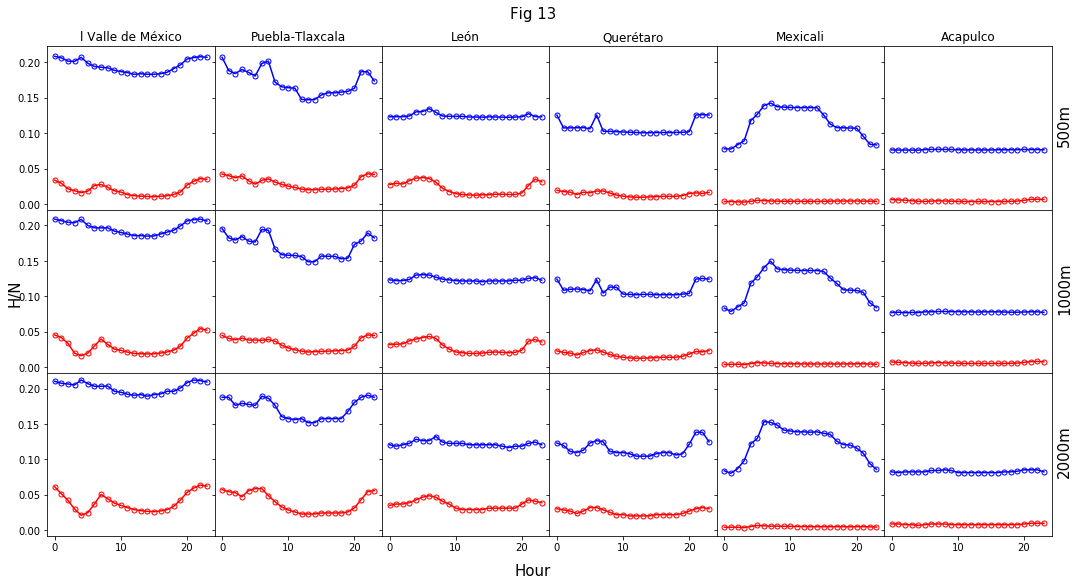

In [65]:
nth_populated_regions = [0,3,6,9,12,15]

n_rows = len(gsides)
n_cols = len(nth_populated_regions)

fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(3*n_cols, 3*n_rows), sharex=True, sharey=True)

fig.text(0.5, .93, 'Fig 13', ha='center', va='center', fontsize=15)
fig.text(0.5, 0.07, 'Hour', ha='center', va='center', fontsize=15)
fig.text(0.1, 0.5, 'H/N', ha='center', va='center', rotation='vertical', fontsize=15)
fig.subplots_adjust(hspace=0,wspace=0)

for i, gside in enumerate(gsides):
    for htype in ['loubar', 'average']:
        color = {'loubar': 'red', 'average': 'blue'}[htype]
        h_by_n = n_hotspot_mpol[(gside,htype)].divide(n_grids[gside],axis='rows')
        for j, r in enumerate(mex_mpol.index[nth_populated_regions]):
            ax = axes[i,j]

            ax.plot(range(24), h_by_n.loc[r], 'o-', color=color, markerfacecolor='None', markersize=5)
            if i==0:
                ax.set_title(r.replace('Zona metropolitana de','').strip())
                
for i, gside in enumerate(gsides):
    ax = axes[i,n_cols-1]
    ax.text(ax.get_xlim()[1]+2, ax.get_ylim()[1]*0.5, f'{gside}m', ha='center', va='center', rotation='vertical', fontsize=15)

## Fig7 and 14  average_hotspot vs population

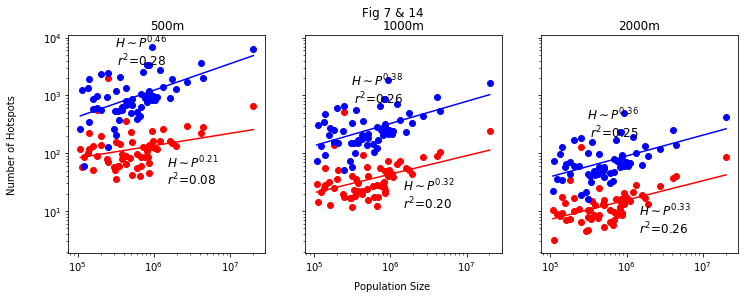

In [24]:
fig, axes = plt.subplots(1, len(gsides), figsize=(12, 4), sharex=True, sharey=True)

fig.suptitle('Fig 7 & 14')
fig.text(0.5, 0.01, 'Population Size', ha='center', va='center')
fig.text(0.06, 0.5, 'Number of Hotspots', ha='center', va='center', rotation='vertical')
# fig.text(1,0.9, r'$H \sim P^{0.6}$')
# fig.text(1, 0.8, r'$r^2 \equal 10$')
for i, gside in enumerate(gsides):
    for hotspot_type in ['loubar', 'average']:
        color = {'loubar': 'red', 'average': 'blue'}[hotspot_type]
        
        x = mex_mpol.population.sort_index()
        y = n_hotspot_mpol[(gside, hotspot_type)].mean(axis=1).sort_index()
        axes[i].scatter(x=x, y=y, color=color)
        axes[i].set_xscale("log")
        axes[i].set_yscale("log")
        
        log_x = np.log(x)
        log_y = np.log(y)
        slope, intercept, r_value, p_value, std_err = stats.linregress(log_x,log_y)
        min_max_x = np.array([x.min(), x.max()])
        min_max_y_fit = np.exp(slope * np.log(min_max_x) + intercept)
        log_scale_mean_x = np.exp(np.log(min_max_x).mean())
        axes[i].plot(min_max_x,min_max_y_fit, color=color)
        axes[i].set_title(f'{gside}m')
        if hotspot_type =='average':
            axes[i].text(log_scale_mean_x, min_max_y_fit.mean()*2.5, r'$H \sim P^{%.02f}$' % slope, ha='right', fontsize=12)
            axes[i].text(log_scale_mean_x, min_max_y_fit.mean()*1.25, r'$r^2 \equal {%.02f}$' % r_value**2, ha='right', fontsize=12)            
        if hotspot_type =='loubar':
            axes[i].text(log_scale_mean_x, min_max_y_fit.mean()/3, r'$H \sim P^{%.02f}$' % slope, ha='left', fontsize=12)
            axes[i].text(log_scale_mean_x, min_max_y_fit.mean()/6, r'$r^2 \equal {%.02f}$' % r_value**2, ha='left', fontsize=12)            

## Fig 9a Compacity Coef. 

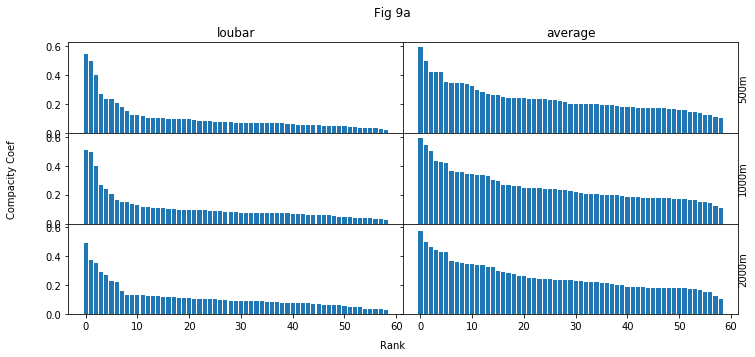

In [25]:
fig, axes = plt.subplots(len(gsides), 2, sharex=True, sharey=True, figsize=(12,5))
cc_order = []
fig.suptitle('Fig 9a')
fig.text(0.5, 0.04, 'Rank', ha='center', va='center')
fig.text(0.06, 0.5, 'Compacity Coef', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(hspace=0,wspace=0)

for i, gside in enumerate(gsides):
    for j, hotspot_type in enumerate(['loubar', 'average']):
        hstats =  pd.DataFrame(hotspot_stats_mpol[(gside, hotspot_type)])
        hstats_sort = hstats.compacity_coefficient.sort_values(ascending=False).to_frame()
        hstats_sort[(hotspot_type, gside)] = range(n_regions)
        cc_order.append(hstats_sort[(hotspot_type, gside)])
        
        ax = axes[i,j]
        ax.bar(range(n_regions), hstats_sort.compacity_coefficient)

        if i==0:
            ax.set_title(hotspot_type)
                
for i, gside in enumerate(gsides):
    ax = axes[i,1]
    ax.text(ax.get_xlim()[1]+1, ax.get_ylim()[1]*0.5, f'{gside}m', ha='center', va='center', rotation='vertical')

In [26]:
pd.concat(cc_order, axis=1, sort=False).T.sort_index().T[['loubar','average']]

loubar           average  \
                                                     500  1000 2000    500    
Zona metropolitana de Tianguistenco                     0    0    2       0   
Zona metropolitana de La Piedad-Pénjamo                 1    1    0       1   
Zona metropolitana de Tula                              2    2    1       8   
Zona metropolitana de San Francisco del Rincón          3    3    3       5   
Zona metropolitana de Cuautla                           4    4    4       6   
Zona metropolitana de Acayucan                          5    8   40       9   
Zona metropolitana de Moroleón-Uriangato                6    5    5      12   
Zona metropolitana de Teziutlán                         7    6    6      54   
Zona metropolitana de Tlaxcala-Apizaco                  8    7    7      33   
Zona metropolitana de Juárez                            9   10   11      46   
Zona metropolitana de Guadalajara                      10   13   10      26   
Zona metropolitana de Cuernavaca                       11    9   14      18   
Zona metropolitana de Coatzacoalcos                    12   14   17      19   
Zona metropolitana de Zamora-Jacona                    13   15   13      56   
Zona metropolitana del Valle de México                 14   11   18      13   
Zona metropolitana de Ocotlán                          15   17   16      51   
Zona metropolitana de Orizaba                          16   24    9      22   
Zona metropolitana de Minatitlán                       17   26   38      11   
Zona metropolitana de Tijuana                          18   12   12      21   
Zona metropolitana de Pachuca                          19   16   25      27   
Zona metropolitana de Zacatecas-Guadalupe              20   18   21      28   
Zona metropolitana de Puebla-Tlaxcala                  21   19   29      14   
Zona metropolitana de Tecomán                          22   21   19       4   
Zona metropolitana de Monterrey                        23   20   33      34   
Zona metropolitana de Tulancingo                       24   22   15       2   
Zona metropolitana de Puerto Vallarta                  25   23   32      29   
Zona metropolitana de Oaxaca                           26   25   20      23   
Zona metropolitana de Córdoba                          27   32    8      32   
Zona metropolitana de Veracruz                         28   27   28      41   
Zona metropolitana de Celaya                           29   35   35      24   
Zona metropolitana de Mérida                           30   36   27      30   
Zona metropolitana de Tehuantepec                      31   40   41      58   
Zona metropolitana de Aguascalientes                   32   37   37      37   
Zona metropolitana de San Luis Potosí - Soledad...     33   29   30      47   
Zona metropolitana de La Laguna                        34   28   36      31   
Zona metropolitana de Nuevo Laredo                     35   34   22      36   
Zona metropolitana de Tehuacán                         36   33   24      50   
Zona metropolitana de Acapulco                         37   31   34      45   
Zona metropolitana de Piedras Negras                   38   39   39      16   
Zona metropolitana de León                             39   30   23       7   
Zona metropolitana de Xalapa                           40   45   31      15   
Zona metropolitana de Toluca                           41   42   42      25   
Zona metropolitana de Querétaro                        42   38   26      39   
Zona metropolitana de Morelia                          43   44   43      20   
Zona metropolitana de Colima-Villa de Álvarez          44   46   46      52   
Zona metropolitana de Rioverde-Ciudad Fernández        45   43   45      35   
Zona metropolitana de Villahermosa                     46   48   48      43   
Zona metropolitana de Tuxtla Gutiérrez                 47   47   44      42   
Zona metropolitana de Monclova-Frontera                48   50   53      44   
Zona metropolitana de 

## Fig 9b

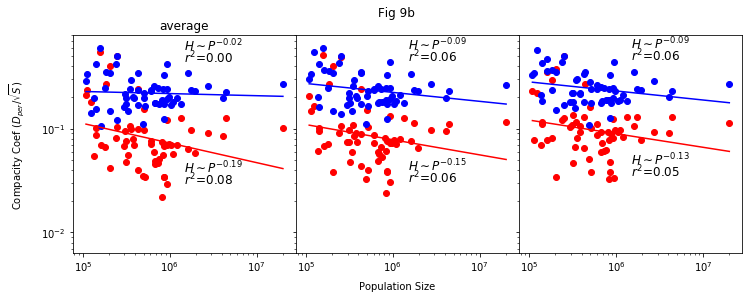

In [27]:
# graph
fig, axes = plt.subplots(1, len(gsides), figsize=(12, 4), sharex=True, sharey=True)

fig.suptitle('Fig 9b')
fig.text(0.5, 0.01, 'Population Size', ha='center', va='center')
fig.text(0.06, 0.5, r'Compacity Coef ($D_{per} / \sqrt{S}$)', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(hspace=0,wspace=0)

for i, gside in enumerate(gsides):
    for hotspot_type in ['loubar', 'average']:
        color = {'loubar': 'red', 'average': 'blue'}[hotspot_type]
        
        hstats =  pd.DataFrame(hotspot_stats_mpol[(gside, hotspot_type)])
        
        x= mex_mpol.loc[hstats.index].population
        y=hstats.compacity_coefficient
        ax = axes[i]
        ax.scatter(x, y, color=color)
        ax.set_xscale("log")
        ax.set_yscale("log")

        log_x = np.log(x)
        log_y = np.log(y)
        slope, intercept, r_value, p_value, std_err = stats.linregress(log_x,log_y)
        min_max_x = np.array([x.min(), x.max()])
        min_max_y_fit = np.exp(slope * np.log(min_max_x) + intercept)
        log_scale_mean_x = np.exp(np.log(min_max_x).mean())
        axes[i].plot(min_max_x,min_max_y_fit, color=color)
        if i==0:
            ax.set_title(hotspot_type)

        if hotspot_type =='average':
            axes[i].text(log_scale_mean_x, min_max_y_fit.mean()*2*1.3, r'$H \sim P^{%.02f}$' % slope, ha='left', fontsize=12)
            axes[i].text(log_scale_mean_x, min_max_y_fit.mean()*2, r'$r^2 \equal {%.02f}$' % r_value**2, ha='left', fontsize=12)            
        if hotspot_type =='loubar':
            axes[i].text(log_scale_mean_x, min_max_y_fit.mean()/2, r'$H \sim P^{%.02f}$' % slope, ha='left', fontsize=12)
            axes[i].text(log_scale_mean_x, min_max_y_fit.mean()/2/1.3, r'$r^2 \equal {%.02f}$' % r_value**2, ha='left', fontsize=12)            

## Fig 15 Permenant hotspot ranking variation

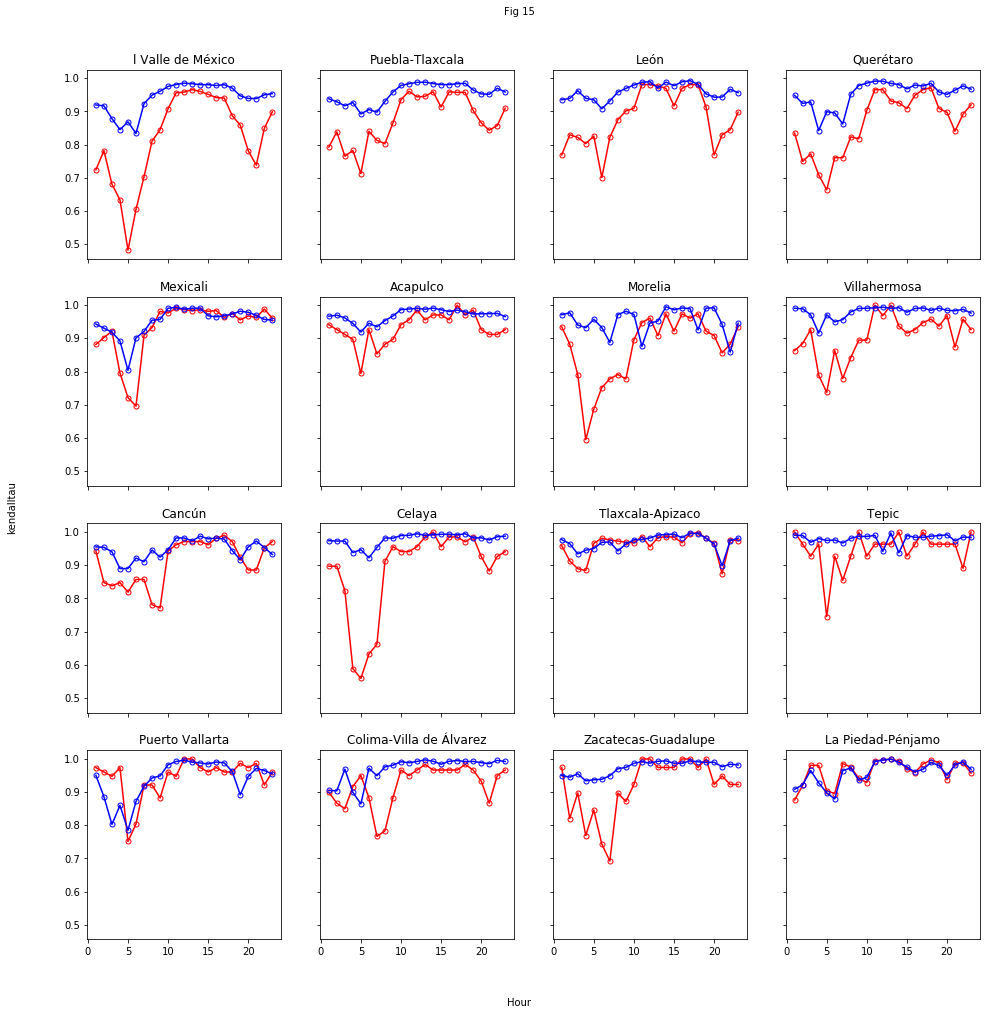

In [64]:
#
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(16, 16), sharex=True, sharey=True)

fig.text(0.5, 0.93, 'Fig 15', ha='center', va='center')
fig.text(0.5, 0.07, 'Hour', ha='center', va='center')
fig.text(0.06, 0.5, 'kendalltau', ha='center', va='center', rotation='vertical')
for htype in ['loubar', 'average']:
    color = {'loubar': 'red', 'average': 'blue'}[htype]
    regions = permanent_regions_mpol[(1000, htype)]
    for i, r in enumerate(mex_mpol.index[list(range(0,59,59//16))[:16]]):
        ax = axes[i // 4, i % 4]
        per_spots = regions[r]
        taus = [
            stats.kendalltau(per_spots[t1], per_spots[t2])[0]
            for t1, t2 in zip(per_spots.columns, per_spots.columns[1:])
        ]
        ax.plot(range(1, 24), taus, 'o-', color=color, markerfacecolor='None', markersize=5)
        ax.set_title(r.replace('Zona metropolitana de','').strip())

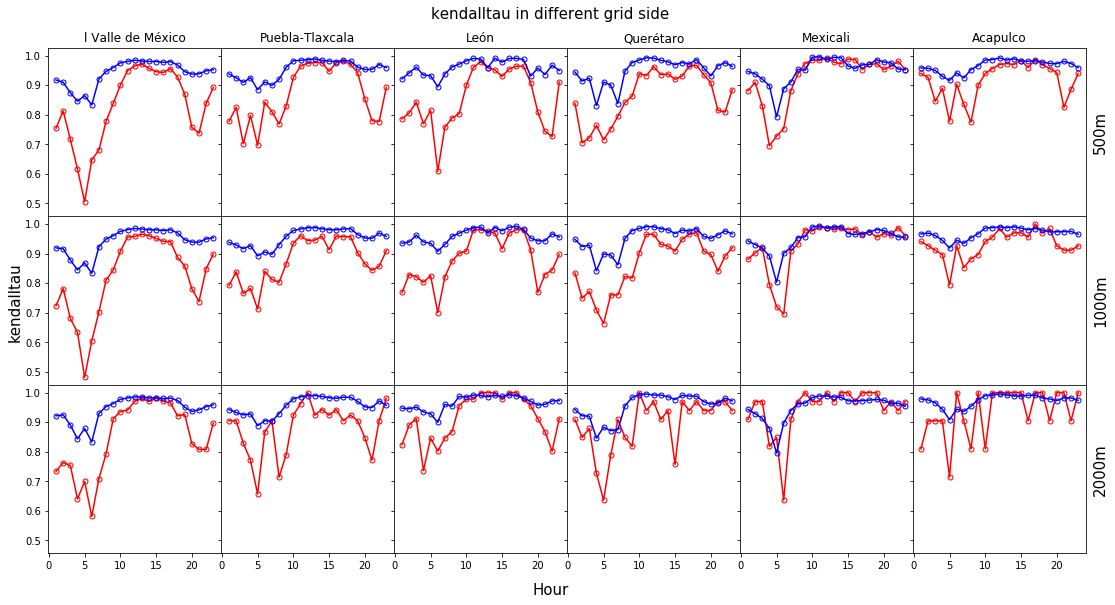

In [63]:
nth_populated_regions = [0,3,6,9,12,15]

n_rows = len(gsides)
n_cols = len(nth_populated_regions)
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(3.1*n_cols, 3.1*n_rows), sharex=True, sharey=True)

fig.text(0.5, .93, 'kendalltau in different grid side', ha='center', va='center', fontsize=15)
fig.text(0.5, 0.07, 'Hour', ha='center', va='center', fontsize=15)
fig.text(0.1, 0.5, 'kendalltau', ha='center', va='center', rotation='vertical', fontsize=15)
fig.subplots_adjust(hspace=0,wspace=0)
for i, gside in enumerate(gsides):
    for htype in ['loubar', 'average']:
        color = {'loubar': 'red', 'average': 'blue'}[htype]
        regions = permanent_regions_mpol[(gside, htype)]
        for j, r in enumerate(mex_mpol.index[nth_populated_regions]):
            ax = axes[i,j]
            per_spots = regions[r]
            taus = [
                stats.kendalltau(per_spots[t1], per_spots[t2])[0]
                for t1, t2 in zip(per_spots.columns, per_spots.columns[1:])
            ]
            ax.plot(range(1, 24), taus, 'o-', color=color, markerfacecolor='None', markersize=5)
            if i==0:
                ax.set_title(r.replace('Zona metropolitana de','').strip())

                     
for i, gside in enumerate(gsides):
    ax = axes[i,n_cols-1]
    ax.text(ax.get_xlim()[1]+2, sum(ax.get_ylim())*0.5, f'{gside}m', ha='center', va='center', rotation='vertical', fontsize=15)

## Fig 10

In [29]:
import seaborn as sns

NameError: name 'hotspot_stats_urban' is not defined

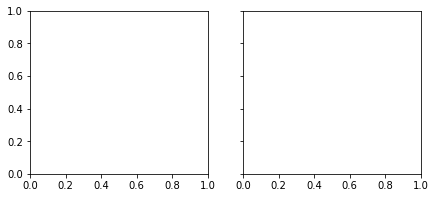

In [30]:
f, axes = plt.subplots(1, 2, figsize=(7, 3), sharex=True, sharey=True)
sns.distplot(hotspot_stats_urban.d_per_med, kde=False, rug=True,bins=7, ax=axes[0])
sns.distplot(hotspot_stats_urban.d_med_int, kde=False, rug=True,bins=7, ax=axes[1])